# Lab 7

Today we will start by discussing PCA versus SVD and then move on to **Supervised Learning**. Today's goals are:

0. Articulate the differences between _clustering_ and _classification_
1. Define _nearest neighbors_
2. Build k-nearest neighbor 
3. Compare kNN to k-means

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

from sklearn.neighbors import KNeighborsClassifier
from scipy.spatial import distance

# This is a file generated just for this lab 
import labseven

## PCA vs SVD

PCA and SVD are both dimension reduction algorithms. But are they the _same_? Let us consider a few questions:
* What are their restrictions? 
* Is one always superior? 
* Is one always preferred?

Discuss these questions with your group. Vote on #Lab07-submissions channel with emojis as to whether you think you would reach for PCA or SVD before the other one. 

## Supervised Learning

As we mentioned in Lab 3, there are two basic kinds of machine learning: supervised and unsupervised. Up until now, we have worked with unsupervised learning, investigating how to _cluster_ data with k-means and how to reduce data to its most essential information with _dimension reduction_. 

Today, we move to our first **supervised** machine learning algorithm. Today's lab is circular in nature; instead of directly defining _supervision_ or detailing the steps of today's algorithm, we will seek to take an intuitive journey towards both. 


### Today's data

We will finally be moving on to a new dataset. Please load `lab7data.csv` as `mystery` using `loadtxt` in _numpy_. 

In [2]:
# Loading our new data
mystery = np.loadtxt("lab7data.csv", delimiter = ",")

In [5]:
# Investigate your data. 

# What is the size of Mystery? How many data points? How many variables? 
print(mystery.shape)

# Is all the information in Mystery numeric?
mystery[:10,:]

(922, 2)


array([[-0.9473975 ,  1.04076179],
       [-0.63358368,  1.40893841],
       [-0.95407408,  0.5264077 ],
       [-0.47016471,  0.64175485],
       [-0.73512544,  0.90445678],
       [-0.75223658,  0.67789971],
       [-0.9172525 ,  0.95684032],
       [-0.95368779,  1.32056529],
       [-0.90015687,  1.10895753],
       [-0.19122596,  1.6526127 ]])

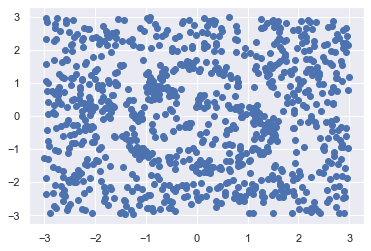

In [6]:
# Create a few visualizations of your data
plt.scatter(mystery[:,0], mystery[:,1])


#### What have you learned?

Jot down a few first impressions of your data

(Your notes here)

#### A bit of Information

This data falls into two groups. With this added information, we might want to use k-means with $k=2$ to see if we can "find" those two groups. 

In [7]:
from sklearn.cluster import KMeans 

In [8]:
# Apply k-means (use the sklearn implementation)
km_alg = KMeans(n_clusters = 2, init = "random", 
                random_state = 1, max_iter = 200)

In [9]:
fit = km_alg.fit(mystery)

In [10]:
labels = fit.labels_

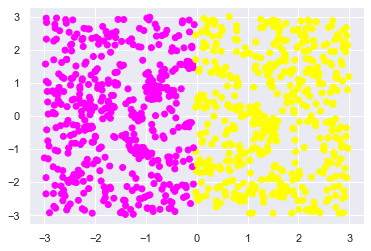

In [12]:
# Plot your results
plt.scatter(mystery[:,0], mystery[:,1], c=labels, cmap = "spring")


In [ ]:
# Block for exploration 

## Classification

Today, we will approach the supervised task of _classification_ or attaching labels to data. 


With this vague definition, are classification and clustering the same? Are they different? _Justify your answers._

**Wait here for a group discussion**



## Adding "supervision"

In supervised machine learning, we have extra information about some of our observations that is regarded as separate from the input variables. This extra information could be a rating, a label, a grouping, or an outcome, among other things. Colloquially, in this course, we might refer to this extra information as _answers_.   

**Note** - Knowing that the data falls into two groups is not the supervision that we are referring to. Rather, it is the having of this kind of extra information, or answers, that is considered to be "supervision."

### Adding a few labels

In classification, we often know the labels of a few datapoints. In this example, we have <font color='red'>red</font> points and <font color='blue'>blue</font> labels. 

Let's look at a few of these labeled points compared to the whole dataset.

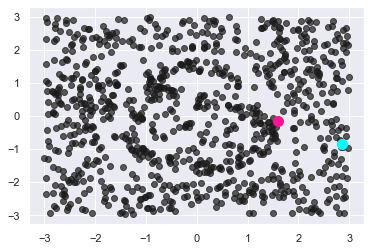

In [20]:
np.random.seed(2022)
# Gather one red and one blue point:

# LABSEVEN is a python file created for this lab that 
#          has two functions: 
#          * RED_POINTS(num) extracts NUM red points 
#          * BLUE_POINTS(num) extracts NUM blue points
red = labseven.red_points(1)
blue = labseven.blue_points(1)

# Plot all the data
plt.scatter(mystery[:,0], mystery[:,1], c="k", alpha = 0.7)

# Plot the two labeled points
plt.scatter(red[:,0], red[:,1], c="deeppink", s = 100)
plt.scatter(blue[:,0], blue[:,1], c="cyan", s = 100)

With this image, what ideas do you have for using the information from our <font color='red'>red</font> point and <font color='blue'>blue</font> point? 


**Wait here for a group brainstorming session**

(Add your notes from our discussion)





####    
####  
_This space is intentionally left blank_
####    
####    
####    
####    
####    
####    
####    
####    
####    
####    
####    
####    

### k-means + labels

In k-means, we iterate between assigning clusters and adjusting each cluster's center. This iteration is required because we do not have any clear idea if we are "right" or not. In other words, we don't have the "true" group labels for each point; so we (iteratively) look for clusters, and once we have clusters, we then assign labels. Recall that in k-means, we don't even know the "right" number of clusters!

In this lab, we **_know_** that we have two groups and we **_know_** that we have a representative from each group. How can we use that information to assign labels to the rest of the data **_without_** iterating between assigning clusters and updating group centers?

In [21]:
# Assign each point in mystery to either "red" or "blue"

# Calculate the distance to Red
red_dist = distance.cdist(mystery,red, "euclidean")

# Calculate the distance to Blue
blue_dist = distance.cdist(mystery,blue, "euclidean")



In [ ]:
# Shape checks! 

In [22]:
# Figure out which is closer 
check_mat = np.hstack([red_dist,blue_dist])

labels = np.argmin(check_mat,axis=1)

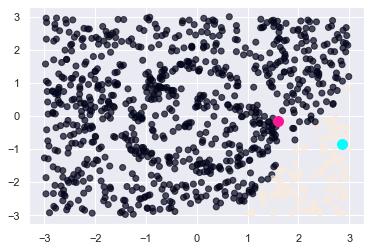

In [25]:


# Plot your resulting labels
plt.scatter(mystery[:,0], mystery[:,1], c=labels, alpha = 0.7)

# Plot your labeled points
plt.scatter(red[:,0], red[:,1], c="deeppink", s = 100)
plt.scatter(blue[:,0], blue[:,1], c="cyan", s = 100)

#### Evaluate your results

Take a moment to consider your image. Is this what you would expect given the original plot?

What would you like to try next? 


**Wait here for a class brainstorming session**

####    
####  
_This space is intentionally left blank_
####    
####    
####    
####    
####    
####    
####    
####    
####    
####    
####    
####    

## Adding more labels

Let's add more labeled points to expand this idea of assigning a label to each data point by the nearest labeled neighbor. This time, let's use 5 of each red points and blue points. 

In [26]:
# Gather five red points and five blue points:
red = labseven.red_points(5)
blue = labseven.blue_points(5)

Again, let's plot these labeled points against our whole dataset: 

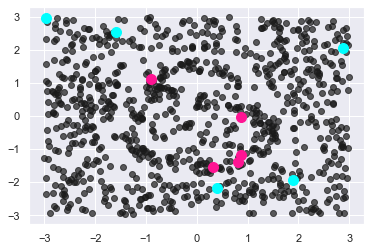

In [28]:
plt.scatter(mystery[:,0], mystery[:,1], c="k", alpha = 0.7)
plt.scatter(red[:,0], red[:,1], c="deeppink", s = 100)
plt.scatter(blue[:,0], blue[:,1], c="cyan", s = 100)

Now assign a point to a group based on the color of the labeled point that it is closest to. We call this closest labeled point the _nearest neighbor._

In [29]:
# Assign each point in mystery to either "red" or "blue"

# Calculate the distance to Red
red_dist = distance.cdist(mystery, red, "euclidean")

# Calculate the distance to Blue
blue_dist = distance.cdist(mystery, blue, "euclidean")

# Figure out which is closer
check_mat = np.hstack([red_dist,blue_dist])
labels_temp = np.argmin(check_mat, axis = 1)



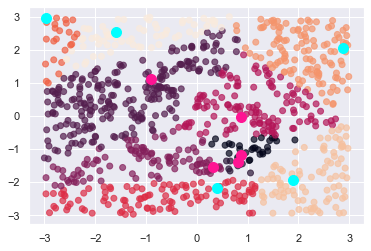

In [30]:
# Plot your resulting labels
plt.scatter(mystery[:,0], mystery[:,1], c=labels_temp, alpha = 0.7)

# Plot your labeled points
plt.scatter(red[:,0], red[:,1], c="deeppink", s = 100)
plt.scatter(blue[:,0], blue[:,1], c="cyan", s = 100)

In [31]:
# This case is slightly different: 
#   We have 10 possible columns in check_mat instead of just two
#   HINT: Index trick!!! 

labels = np.zeros([922,1])
inds = labels_temp > 4
labels[inds] = 1

# red => 0, blue => 1

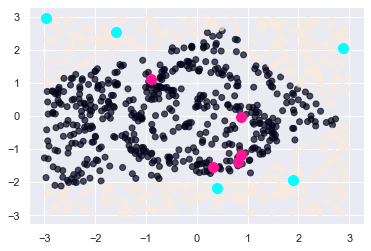

In [32]:
# Plot your results
plt.scatter(mystery[:,0], mystery[:,1], c=labels, alpha = 0.7)

# Plot labeled points
plt.scatter(red[:,0], red[:,1], c="deeppink", s = 100)
plt.scatter(blue[:,0], blue[:,1], c="cyan", s = 100)

#### Evaluate your results

Take a moment to consider your image. Is this what you would expect given your first attempt classifying attempt and given the original plot (without colors)?

What would you like to try next? 


**Wait here for a class brainstorming session**

####    
####  
_This space is intentionally left blank_
####    
####    
####    
####    
####    
####    
####    
####    
####    
####    
####    
####    

## Using more than one neighbor

In this next phase, we will use the same 10 labeled points (5 of each class) from above. But this time, we will label our points based on the three closest labeled neighbors. Before continuing, let us consider the different labeling for a collection of three neighbors, and decide how we would like to handle this:
* {<font color='blue'>blue</font>, <font color='blue'>blue</font>, <font color='blue'>blue</font>}
* {<font color='blue'>blue</font>, <font color='blue'>blue</font>, <font color='red'>red</font>}
* {<font color='blue'>blue</font>, <font color='red'>red</font>, <font color='red'>red</font>}
* {<font color='red'>red</font>, <font color='red'>red</font>, <font color='red'>red</font>}

(Based on the above, why do you think we skipped over using two nearest neighbors?) 

In [33]:
# Assign each point in mystery to either "red" or "blue"
#        based on three neighbors

# Calculate the distance to Red
red_dist = distance.cdist(mystery, red, "euclidean")

# Calculate the distance to Blue
blue_dist = distance.cdist(mystery, blue, "euclidean")




In [34]:
# Figure out which three points are closest
check_mat = np.hstack([red_dist,blue_dist])

# Using argsort, figure out which three are closest: 
closest_points = np.argsort(check_mat,axis = 1)

threeNN = closest_points[:,:3]

In [36]:
threeNN[:10,:]

array([[2, 9, 4],
       [2, 9, 4],
       [2, 4, 9],
       [2, 4, 9],
       [2, 9, 4],
       [2, 4, 9],
       [2, 9, 4],
       [2, 9, 4],
       [2, 9, 4],
       [2, 9, 4]])

In [37]:
# Start with a zero matrix the same size as threeNN
n_rows = mystery.shape[0]
binary_3NN = np.zeros([n_rows,3])

In [38]:
# Use the index trick to find those closest to blue points
inds = threeNN > 4

# Place a 1 when a blue point is a nearest neighbor
binary_3NN[inds] = 1

In [39]:
threeNN[:10,:], binary_3NN[:10,:]

(array([[2, 9, 4],
        [2, 9, 4],
        [2, 4, 9],
        [2, 4, 9],
        [2, 9, 4],
        [2, 4, 9],
        [2, 9, 4],
        [2, 9, 4],
        [2, 9, 4],
        [2, 9, 4]]),
 array([[0., 1., 0.],
        [0., 1., 0.],
        [0., 0., 1.],
        [0., 0., 1.],
        [0., 1., 0.],
        [0., 0., 1.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.]]))

In [40]:
# Use sum + index trick to tell 
#     you which points are closer to more blue points

labels_temp = np.sum(binary_3NN, axis = 1)

labels = labels_temp > 1

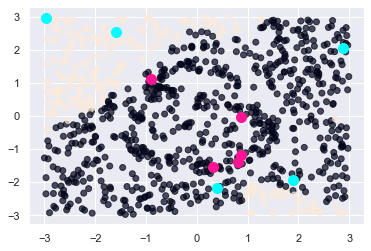

In [41]:
# Plot your results
plt.scatter(mystery[:,0], mystery[:,1], c=labels, alpha = 0.7)

# Plot labeled points
plt.scatter(red[:,0], red[:,1], c="deeppink", s = 100)
plt.scatter(blue[:,0], blue[:,1], c="cyan", s = 100)

#### Evaluate your results

Take a moment to consider your image. Is this what you would expect given your first attempt classifying attempt and given the original plot (without colors)?

What would you like to try next? 


**Wait here for a class brainstorming session**

####    
####  
_This space is intentionally left blank_
####    
####    
####    
####    
####    
####    
####    
####    
####    
####    
####    
####    

We could keep increasing either the number of labeled points or the number of labeled neighbors we compare to; we could consider doing both! But our ability to do either is often dictated by the data, the context of the data, or another limiting factor. However the general process that we have done is known as _k-nearest neighbor_ or kNN, for short.

## k-Nearest Neighbors

To apply kNN, we need to have a dataset with a few labeled points. Then we need to decide how many labeled neighbors we want each data point to "consult" to determine the labeling. This is the $k$ in kNN. 

**Question** - Before moving on, is the $k$ in k-means the same as the $k$ in kNN? Why or why not?

## kNN in `sklearn`

As you might expect, the implementation of kNN in `sklearn` requires more than one step:
1. Define the particulars for our version of kNN
2. Fit the kNN to the labled points that we have
3. Assign labels to the unlabeled data

For this part, let's assume that we have 20 labeled points. To run this in python, we also need a vector encoding those labels. For this example, we say <font color='red'>red</font> points are label 0 and <font color='blue'>blue</font> points are label 1. 

Here we will use a few of the built in _numpy_ functions to stack our data and the associated labels:

In [ ]:
np.random.seed(2022)

red = labseven.red_points(10)
blue = labseven.blue_points(10)

# Preparing the labeled data
label_data = np.vstack([red, blue])

# These are the labels for the labeled points
pt_labels = np.zeros(20)
pt_labels[10:20] = 1

# Check the shapes
print(label_data.shape)
print(labels)

In [ ]:
# Step one - Define the kNN based on the number of neighbors (ie. the k)
kNN_alg = KNeighborsClassifier(n_neighbors=1)

In [ ]:
# Step two - Fit the kNN to our labeled data
kNN_alg.fit(label_data,pt_labels)


In [ ]:
# Step three - Assign the labels to the unlabeled data
all_labels = kNN_alg.predict(mystery)

In [ ]:
# Check your results

plt.scatter(mystery[:,0], mystery[:,1], c=all_labels, cmap = "PiYG", alpha = 0.5)
plt.scatter(red[:,0], red[:,1], c="deeppink", alpha = 1)
plt.scatter(blue[:,0], blue[:,1], c="cyan")

What do you think of the above results? Add a few notes here - 

### Playing with values of $k$

For the above implementation, we used on the "nearest" neighbor to make the assignments. Let's try this process again for a few values of  $k$, say {3, 7, 11, 15, 19}

Run each version using the convention of `_k` at the end of each variable, as shown below: 


In [ ]:
# Run kNN for k=3
kNN_alg_3 = KNeighborsClassifier(n_neighbors=???)
kNN_alg_3.fit(label_data,pt_labels)
all_labels_3 = kNN_alg_3.predict(mystery)

In [ ]:
# Plot results for k=3
plt.scatter(mystery[:,0], mystery[:,1], c=???, cmap = "PiYG", alpha = 0.5)
plt.scatter(red[:,0], red[:,1], c="deeppink", alpha = 1)
plt.scatter(blue[:,0], blue[:,1], c="cyan")

In [ ]:
# Run kNN for k=7
kNN_alg_7 = 
kNN_alg_7.fit(????,????)
all_labels_7 = kNN_alg_7.predict(????)

In [ ]:
# Plot results for k=7

In [ ]:
# Run kNN for k=11

In [ ]:
# Plot results for k=11

In [ ]:
# Run kNN for k=15

In [ ]:
# Plot results for k=15

In [ ]:
# Run kNN for k=19


In [ ]:
# Plot results for k=19


Given the above plots, what do you think the two groupings are? Which is the "right" value of $k$?


What do you think would happen if you had more labeled points and used the same values of $k$?

## Clustering vs. Classification

Clustering and classification are often used as representative algorithms for unsupervised and supervised learning, respectively. How do clustering and classification differ? Specifically, where is the supervision in classification? 

Could the student dataset (from previous labs) be used in a classification task? Why or why not? 

### Final Thoughts

To finish up this lab, select one of the values of $k$ and use the starter code in this directory to help you follow the [Nearest Neighbors Classification example for `sklearn`](https://scikit-learn.org/stable/auto_examples/neighbors/plot_classification.html#sphx-glr-auto-examples-neighbors-plot-classification-py), which should create a plot of the decision boundaries for kNN with your value of $k$. Share your plot in a post on **#lab07_submission** channel on slack and share something that surprised you about your plot. 

If your have questions from this lab, post them to #lab_questions with the preamble (i.e. starting with **Lab7**). If you have the same question, please use one of the emoji's to upvote the question. If you would like to answer someone's question, please use the thread function. This will tie your answer to their question. 

#### References consulted
0. _Doing Data Science: Straight talk from the frontline_ by C. O'Neil & R. Schutt (2014)
1. _Python Machine Learning_
2. [kNN in `sklearn`](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier)
3. [Nearest Neighbors Classification example for `sklearn`](https://scikit-learn.org/stable/auto_examples/neighbors/plot_classification.html#sphx-glr-auto-examples-neighbors-plot-classification-py)
4. [seed helpfile in `numpy`](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.random.seed.html)
5. [List of named colors](https://matplotlib.org/3.1.0/gallery/color/named_colors.html)
6. [Choosing Colormaps in Matplotlib](https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html)